In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sobel(path):
    img = cv2.imread(path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    edges_x = cv2.filter2D(gray, -1, kernel_x)
    edges_y = cv2.filter2D(gray, -1, kernel_y)
    edges = edges_x + edges_y
    
    plt.figure(figsize=(12,4))
    plt.imshow(edges)
    plt.show()

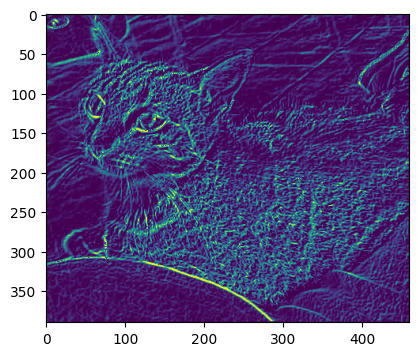

In [3]:
sobel("cat.jpg")

### Хорошо выделил детали либо границы объектов

In [4]:
def canny(path):
    img = cv2.imread(path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150)
    
    plt.figure(figsize=(12,4))
    plt.imshow(edges)
    plt.show()

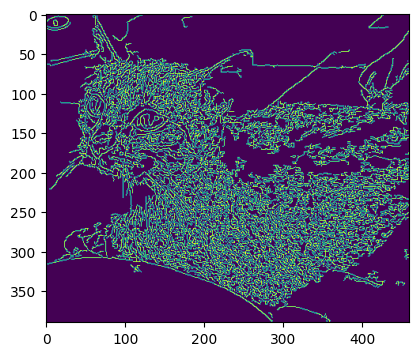

In [5]:
canny("cat.jpg")

### Хорошо выделил мелкие объекты на самой кошке, но без границ большинства объектов

In [6]:
def roberts(path):
    img = cv2.imread(path)
    
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
    kernely = np.array([[0, -1], [1, 0]], dtype=int)
    x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
    y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)

    absX = cv2.convertScaleAbs(x)
    absY = cv2.convertScaleAbs(y)
    roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
    
    plt.figure(figsize=(12,4))
    plt.imshow(roberts)
    plt.show()

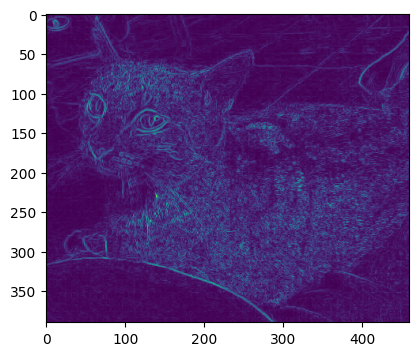

In [7]:
roberts("cat.jpg")

### Более кучно выделил детали на самой кошке, видны границы, но не как на Sobol 